# Day 7 – World Happiness Report Analysis (2015–2023)

## Objective
To analyze global happiness trends from 2015 to 2023 and explore how economic, social, and health factors relate to overall well-being across countries.

Dataset Link:
https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors

Note:
The dataset consists of multiple CSV files (one per year). Column names were standardized before analysis.


## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## Step 2: Load All CSV Files (2015–2023)

In [2]:
files = [
    "WHR_2015.csv",
    "WHR_2016.csv",
    "WHR_2017.csv",
    "WHR_2018.csv",
    "WHR_2019.csv",
    "WHR_2020.csv",
    "WHR_2021.csv",
    "WHR_2022.csv",
    "WHR_2023.csv"
]

dfs = []

for file in files:
    year = int(file.split("_")[1].replace(".csv", ""))
    df_year = pd.read_csv(file)
    df_year["year"] = year
    dfs.append(df_year)

df = pd.concat(dfs, ignore_index=True)
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


## Step 3: Clean Column Names

In [3]:
df.columns = (
    df.columns.str.lower().str.strip().str.replace(" ", "_")
)
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

## Step 4: Select Relevant Columns

In [4]:
required_columns = [
    "country",
    "region",
    "year",
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom_to_make_life_choices",
    "generosity",
    "perceptions_of_corruption"
]

df = df[required_columns]
df.head()

,country,region,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North America and ANZ,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


## Step 5: Handle Missing Values

In [5]:
df.isnull().sum()

country                         0
region                          0
year                            0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
dtype: int64

In [6]:
df = df.dropna()

## Step 6: Global Happiness Trend

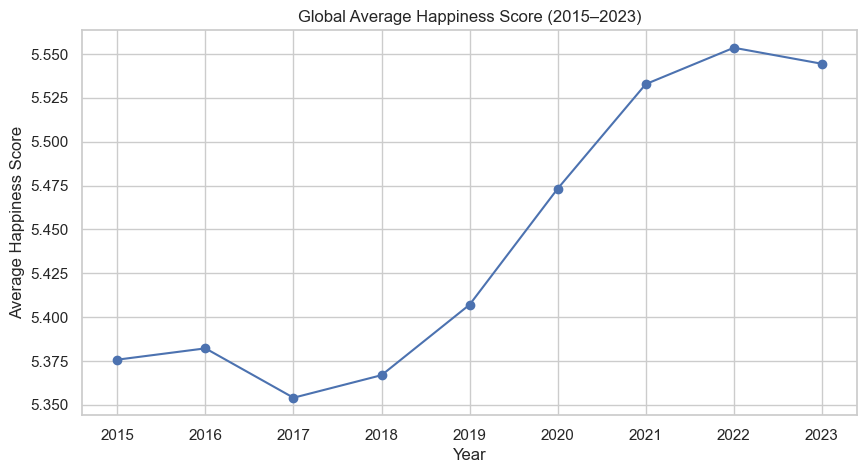

In [7]:
avg_happiness = df.groupby("year")["happiness_score"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(avg_happiness["year"], avg_happiness["happiness_score"], marker="o")
plt.title("Global Average Happiness Score (2015–2023)")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.show()

## Step 7: Region-wise Happiness Comparison

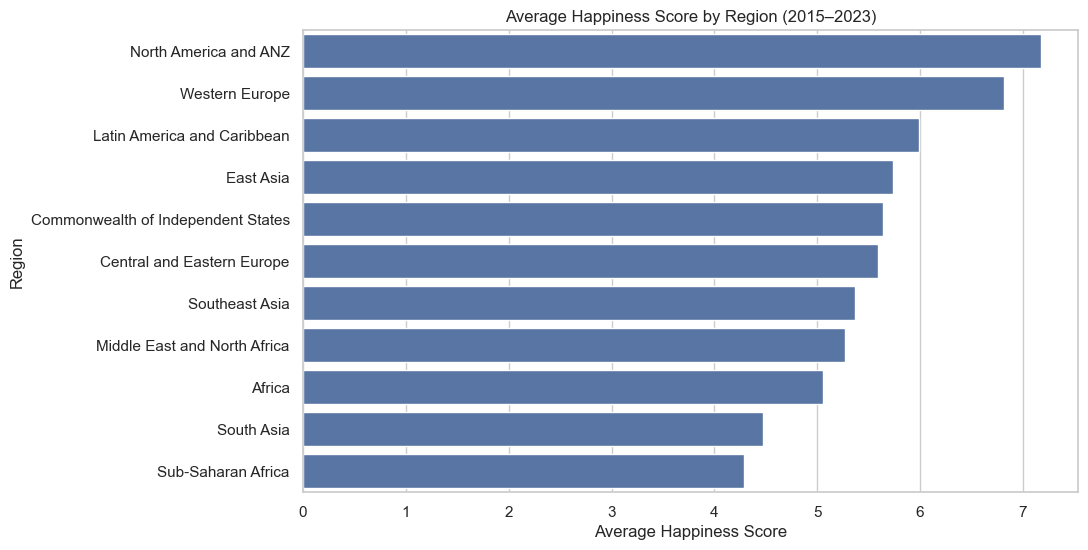

In [8]:
region_happiness = (
    df.groupby("region")["happiness_score"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=region_happiness, x="happiness_score", y="region")
plt.title("Average Happiness Score by Region (2015–2023)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Region")
plt.show()

## Step 8: Correlation Heatmap

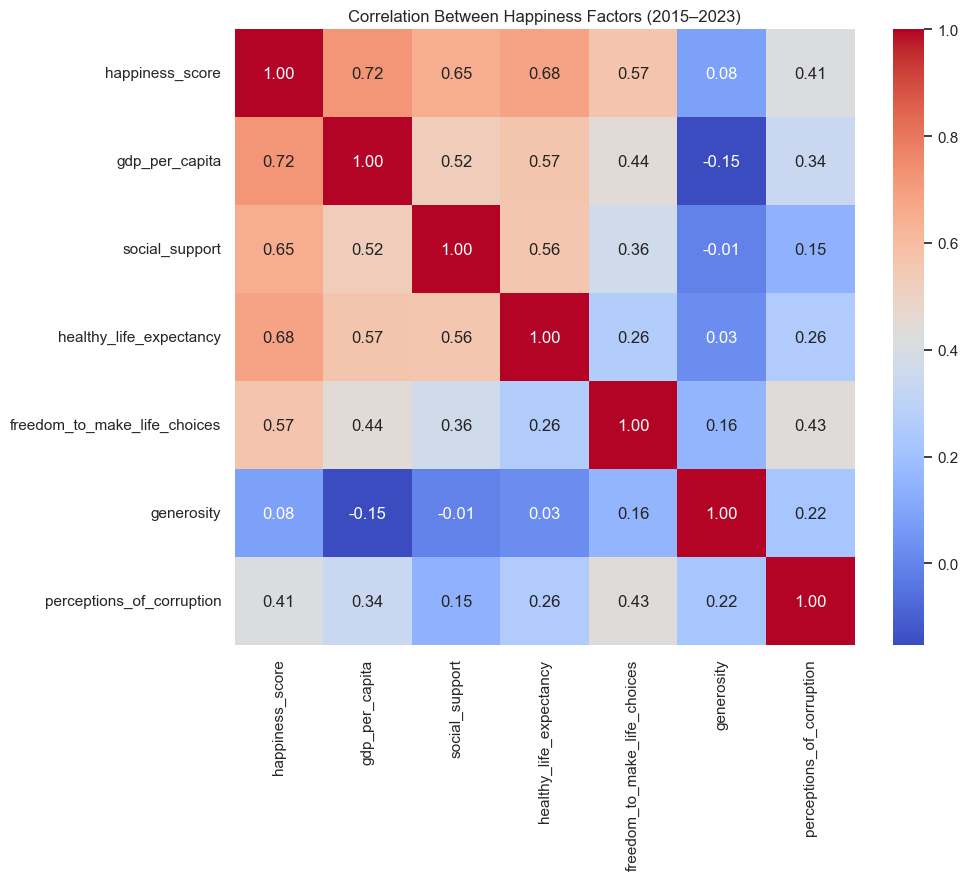

In [9]:
features = [
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom_to_make_life_choices",
    "generosity",
    "perceptions_of_corruption"
]

plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Happiness Factors (2015–2023)")
plt.show()

## Conclusion

This analysis examined global happiness trends from 2015 to 2023, revealing how well-being varies across regions and changes over time. Economic stability, social support, health, and freedom to make life choices show the strongest relationships with happiness scores, while other factors add important contextual depth.

By analyzing multiple years of data, this project highlights that happiness is dynamic rather than static and influenced by a combination of economic, social, and institutional factors. Such insights emphasize the value of longitudinal analysis when studying quality of life and societal well-being.
